In [ ]:

# WKDM
# LZ4 / lz4m
# baselines


In [1]:
import numpy
import pandas
from matplotlib import pyplot as plt

numpy.set_printoptions(formatter={'int':hex})

In [2]:

def load_memfile(path):
    buf = open(path, 'rb').read()
    arr = numpy.frombuffer(buf, dtype=numpy.uint8)
    return arr

def test_load_memfile():
    arr = load_memfile('x264.core.dat')
    
    # dumped by compr tool
    line0 = [0x21,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0xfd,0xf7,0xff,0x7f,
             0x00,0x00,0x10,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0xff,0xfb,0xeb,0xbf,
             0x00,0x00,0x00,0x00,0x06,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x00,0x10,
             0x00,0x00,0x00,0x00,0x00,0x00,0x11,0x00,0x00,0x00,0x00,0x00,0x00,0x00,
             0x64,0x00,0x00,0x00,0x00,0x00,0x00,0x00,]

    
    line9 = [0x18,0x8e,0x03,0x45,0x0e,0x20,0x8d,0x04,0x45,0x0e,0x28,0x8c,0x05,0x48,
             0x0e,0x30,0x86,0x06,0x48,0x0e,0x38,0x83,0x07,0x47,0x0e,0x40,0x6e,0x0e,
             0x38,0x41,0x0e,0x30,0x41,0x0e,0x28,0x42,0x0e,0x20,0x42,0x0e,0x18,0x42,
             0x0e,0x10,0x42,0x0e,0x08,0x00,0x10,0x00,0x00,0x00,0x7c,0x70,0x00,0x00,
             0x88,0xa1,0xfe,0xff,0x05,0x00,0x00,0x00,]
    
    cachelines = arr.reshape((-1,64))
    c_line9 = cachelines[9,:]

    numpy.testing.assert_allclose(c_line9, line9)
    
test_load_memfile()


In [23]:
# grep -H -B 2 'CR:' baselines/zeropoint/*.results | grep -v 'completed\|--'
# grep -H -C1 'BDI' baselines/bdi_fpc_zca/*.out

def load_baselines():
    df = pandas.read_csv('results.csv')
    return df

df = load_baselines()
df[df.method == '0block']


,dataset,method,cr
1,bwaves,0block,1.00055
10,mcf,0block,1.00046
19,namd,0block,1.19850
28,x264,0block,1.16696
37,xz,0block,1.57310


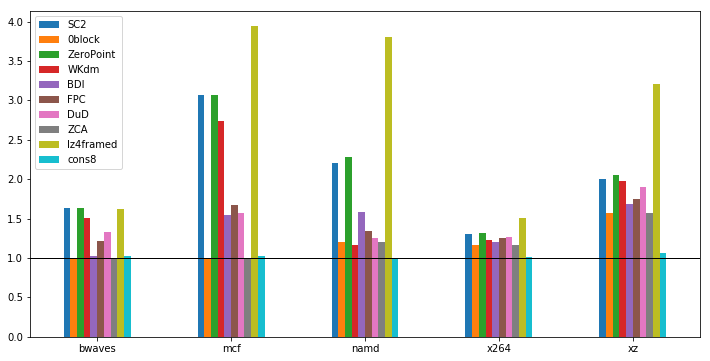

In [36]:
def plot_grouped(results):

    results = results.copy()
    results.index = results.dataset
    results = results.sort_index()
    
    compression = {}
    methods = results.method.unique()
    dataset = list(results.dataset.unique())

    for method in methods:
        sub = results[results.method == method]
        dataset_order = list(sub.index)
        assert dataset_order == dataset, (dataset_order, dataset) 
        compression[method] = list(sub.cr)
    
    df = pandas.DataFrame(compression, index=dataset)

    plot = df.plot.bar(figsize=(12, 6), rot=0)
    plot.axhline(y=1.0, color='black', linestyle='-', linewidth=1)
    
    return plot.get_figure()

fig = plot_grouped(df)
fig.savefig('results.png')

method
0block       AxesSubplot(0.125,0.125;0.775x0.755)
BDI          AxesSubplot(0.125,0.125;0.775x0.755)
DuD          AxesSubplot(0.125,0.125;0.775x0.755)
FPC          AxesSubplot(0.125,0.125;0.775x0.755)
SC2          AxesSubplot(0.125,0.125;0.775x0.755)
WKdm         AxesSubplot(0.125,0.125;0.775x0.755)
ZCA          AxesSubplot(0.125,0.125;0.775x0.755)
ZeroPoint    AxesSubplot(0.125,0.125;0.775x0.755)
lz4framed    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

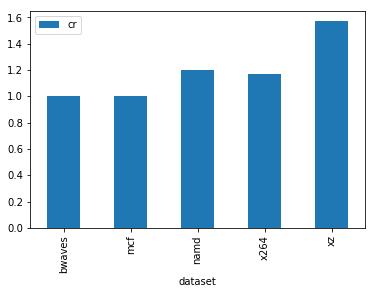

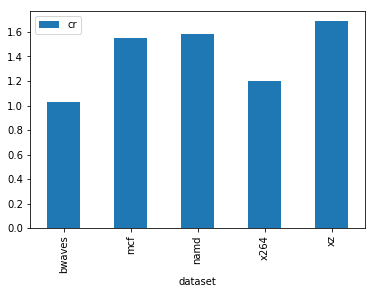

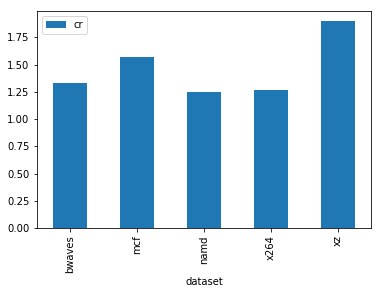

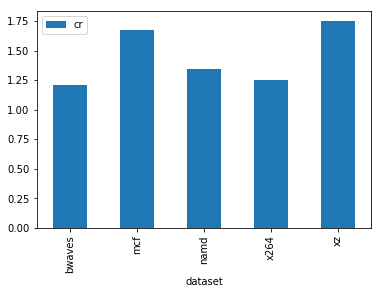

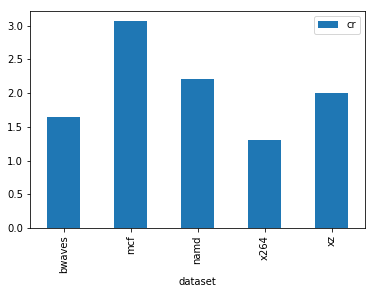

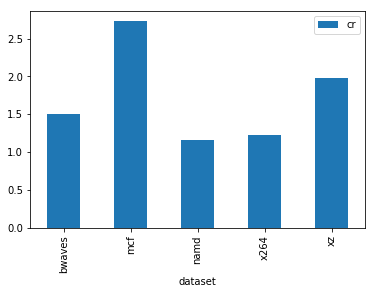

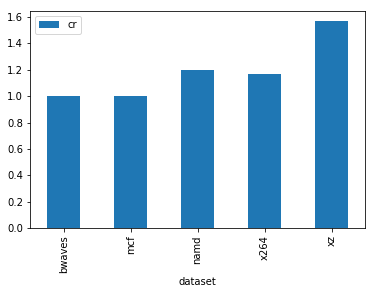

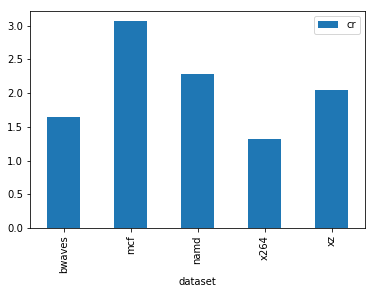

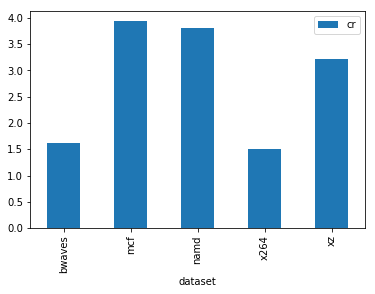

In [10]:
df.groupby('method').plot(kind='bar',y='cr',x='dataset')

In [ ]:
df = pd.DataFrame(groups, index=group_labels).T

# Plot.
pd.concat(axis=1).plot.bar(

In [11]:
df.dataset.unique()

array(['bwaves', 'mcf', 'namd', 'x264', 'xz'], dtype=object)

In [16]:

datasets = ['bwaves', 'mcf', 'namd', 'x264', 'xz']

def try_lz4(dataset):
    import lz4.frame
    

    path = dataset+'.core.dat' # created by modified ./compr
    uncompressed = open(path, 'rb').read()
    arr = load_memfile(path)
    
    cachelines = arr.reshape((-1,64))
    compressed_size = 0
    for i in range(cachelines.shape[0]):
        line = cachelines[i]
        #print('i', i)
    
        compressed = lz4.frame.compress(uncompressed)
        compressed_size += len(compressed)
    
    ratio = len(uncompressed)/compressed_size
    print('LZ4 compressed', path, ratio)
    
for d in datasets:
    try_lz4(d)


KeyboardInterrupt: 

In [79]:
cachelines = arr.reshape((-1,64))
cachelines.shape


(2742853, 64)

In [80]:
dwords = cachelines.view(dtype=numpy.int32)
dwords.shape

n_zeros = dwords.shape[0]*dwords.shape[1] - numpy.count_nonzero(dwords)
n_zeros

7521405